In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics



In [21]:
#Read data
file_path = "../../dataset/train_val_test_preprocessed.csv"
data = pd.read_csv(file_path)
data.head()

,sentiment,content
0,sadness,im feeling rather rotten im ambitious right
1,sadness,im updating blog feel shitty
2,sadness,never make separate ever want feel like ashamed
3,joy,left bouquet red yellow tulip arm feeling slig...
4,sadness,feeling little vain one


In [22]:
data = data.dropna(subset=['content'])
X = data['content'].astype(str)
y = data['sentiment']

# Label encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# TF-IDF vectorization
vec = TfidfVectorizer()
X_train_tfidf = vec.fit_transform(X_train)
X_test_tfidf = vec.transform(X_test)


In [23]:
# Initialize and train an SVM classifier
svm = SVC(random_state=42)
svm.fit(X_train_tfidf, y_train)

# Make predictions on the test set
svm_pred = svm.predict(X_test_tfidf)

              precision    recall  f1-score   support

           0       0.89      0.82      0.85       266
           1       0.88      0.82      0.85       254
           2       0.85      0.96      0.90       683
           3       0.92      0.67      0.77       156
           4       0.90      0.92      0.91       572
           5       0.93      0.58      0.71        64

    accuracy                           0.88      1995
   macro avg       0.89      0.79      0.83      1995
weighted avg       0.88      0.88      0.87      1995



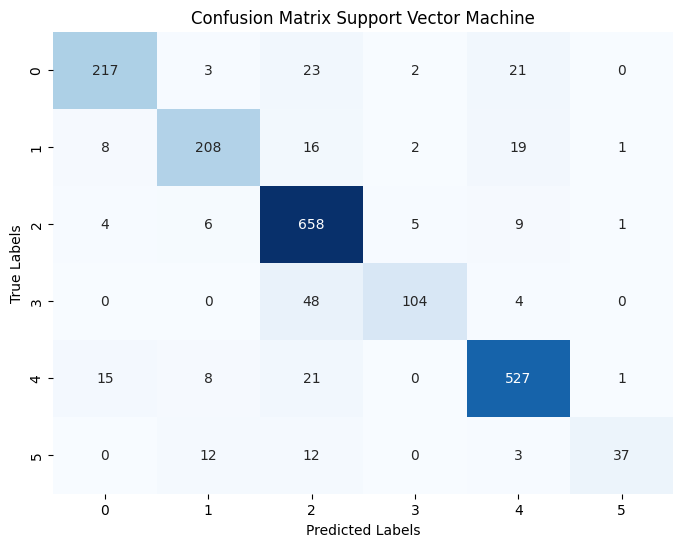

In [24]:
# Print classification report
print(classification_report(y_test, svm_pred, zero_division='warn'))

# Generate and display confusion matrix
confusion_m = confusion_matrix(y_test, svm_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_m, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Support Vector Machine')
plt.show()


In [25]:
target_names = data.target_names if hasattr(data, 'target_names') else None

# Generate and print classification report
report = metrics.classification_report(y_test, svm_pred, target_names=target_names, zero_division='warn')
print("\nClassification Report:")
print(report)






Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.82      0.85       266
           1       0.88      0.82      0.85       254
           2       0.85      0.96      0.90       683
           3       0.92      0.67      0.77       156
           4       0.90      0.92      0.91       572
           5       0.93      0.58      0.71        64

    accuracy                           0.88      1995
   macro avg       0.89      0.79      0.83      1995
weighted avg       0.88      0.88      0.87      1995



In [26]:
# Calculate and print performance metrics for SVM classifier
accuracy = accuracy_score(y_test, svm_pred)
precision = precision_score(y_test, svm_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, svm_pred, average='weighted')
f1 = f1_score(y_test, svm_pred, average='weighted')

# Display performance metrics
print("Name: SVM")
print("Accuracy: z", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1: ", f1)

Name: SVM
Accuracy: z 0.8776942355889724
Precision:  0.8806868101778665
Recall:  0.8776942355889724
F1:  0.8746469171434184
